## **Importando as Ferramentas (Bibliotecas)**

In [ ]:
# Importação das bibliotecas necessárias.
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

## **Carregando e Unindo os Dados**

In [ ]:
# Carregando cada arquivo CSV.
url_1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url_2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url_3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url_4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Lendo cada arquivo CSV.
df_1 = pandas.read_csv(url_1, delimiter=',', encoding='utf-8')
df_2 = pandas.read_csv(url_2, delimiter=',', encoding='utf-8')
df_3 = pandas.read_csv(url_3, delimiter=',', encoding='utf-8')
df_4 = pandas.read_csv(url_4, delimiter=',', encoding='utf-8')

# Para sabermos de qual loja veio cada venda, é criada uma coluna 'Loja' em cada tabela.
df_1['Loja'] = 'Loja 1'
df_2['Loja'] = 'Loja 2'
df_3['Loja'] = 'Loja 3'
df_4['Loja'] = 'Loja 4'

In [ ]:
# Unindo as quatro tabelas em uma só.
df_total = pandas.concat([df_1, df_2, df_3, df_4], ignore_index=True)

# Exibindo as 5 primeiras linhas da tabela unificada.
display(df_total.head())

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


## **Análise dos Dados**

In [ ]:
# Faturamento total de cada loja.
faturamento_por_loja = df_total.groupby('Loja')['Preço'].sum().reset_index()
faturamento_por_loja.columns = ['Loja', 'Faturamento Total']
display(faturamento_por_loja.style.format({'Faturamento Total': 'R$ {:,.2f}'}))

,Loja,Faturamento Total
0,Loja 1,"R$ 1,534,509.12"
1,Loja 2,"R$ 1,488,459.06"
2,Loja 3,"R$ 1,464,025.03"
3,Loja 4,"R$ 1,384,497.58"


In [ ]:
# Quantidade de vendas por categoria para cada loja
vendas_por_categoria_loja = df_total.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')
vendas_pivotadas = vendas_por_categoria_loja.pivot(index='Categoria do Produto', columns='Loja', values='Quantidade de Vendas').fillna(0)
display(vendas_pivotadas)

Loja,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


In [ ]:
# A média das avaliações dos clientes para cada loja.
media_avaliacoes = df_total.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacoes = media_avaliacoes.rename(columns={'Avaliação da compra': 'Média de Avaliação'})
display(media_avaliacoes)

,Loja,Média de Avaliação
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


In [ ]:
# Quais produtos foram os mais vendidos e os menos vendidos em cada loja.
vendas_produto = df_total.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')
vendas_produto = vendas_produto.sort_values(['Loja', 'Quantidade Vendida'], ascending=[True, False])
mais_vendido = vendas_produto.groupby('Loja').first().reset_index()
menos_vendido = vendas_produto.groupby('Loja').last().reset_index()

print('Produto Mais Vendido\n')
display(mais_vendido)

print('\n\nProduto Menos Vendido\n')
display(menos_vendido)

Produto Mais Vendido



,Loja,Produto,Quantidade Vendida
0,Loja 1,Guarda roupas,60
1,Loja 2,Iniciando em programação,65
2,Loja 3,Kit banquetas,57
3,Loja 4,Cama box,62




Produto Menos Vendido



,Loja,Produto,Quantidade Vendida
0,Loja 1,Headset,33
1,Loja 2,Jogo de tabuleiro,32
2,Loja 3,Blocos de montar,35
3,Loja 4,Guitarra,33


In [ ]:
# O custo médio de frete para cada loja.
custo_medio_frete = df_total.groupby('Loja')['Frete'].mean().reset_index()
custo_medio_frete = custo_medio_frete.rename(columns={'Frete': 'Custo Médio do Frete'})
display(custo_medio_frete.style.format({'Custo Médio do Frete': 'R$ {:,.2f}'}))

,Loja,Custo Médio do Frete
0,Loja 1,R$ 34.69
1,Loja 2,R$ 33.62
2,Loja 3,R$ 33.07
3,Loja 4,R$ 31.28


## **Visualização dos Gráficos**

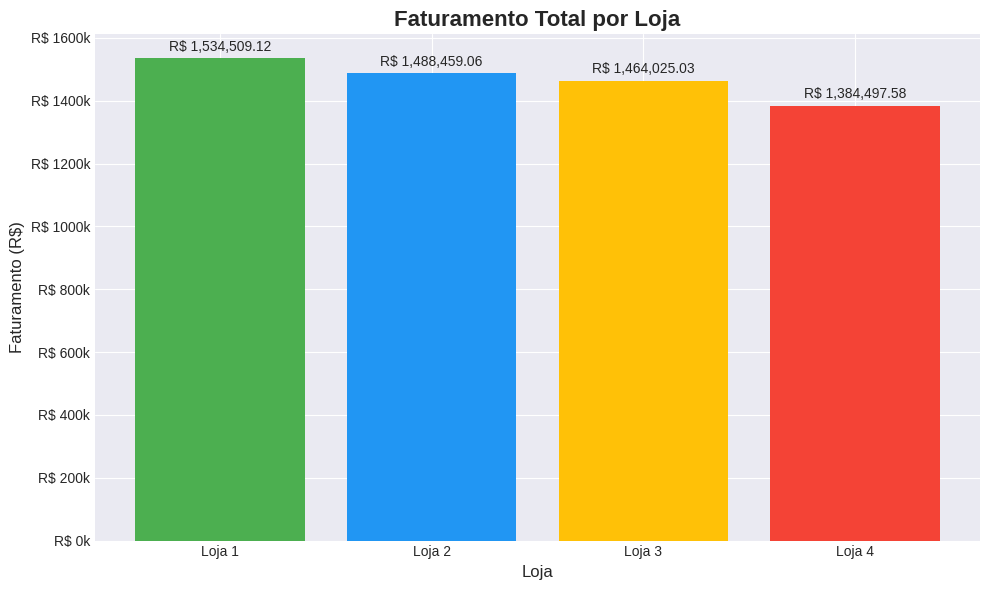

In [ ]:
# Estilo visual mais agradável para os gráficos.
plt.style.use('seaborn-v0_8-darkgrid')

# Criando a figura e os eixos do gráfico.
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(faturamento_por_loja['Loja'], faturamento_por_loja['Faturamento Total'], color=['#4CAF50', '#2196F3', '#FFC107', '#F44336'])
ax.set_title('Faturamento Total por Loja', fontsize=16, fontweight='bold')
ax.set_ylabel('Faturamento (R$)', fontsize=12)
ax.set_xlabel('Loja', fontsize=12)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'R$ {int(x/1000)}k'))
ax.bar_label(bars, labels=[f'R$ {x:,.2f}' for x in faturamento_por_loja['Faturamento Total']], padding=3)
plt.tight_layout()
plt.savefig('faturamento_por_loja.png')

# Mostra o gráfico de Faturamento Total.
plt.show()

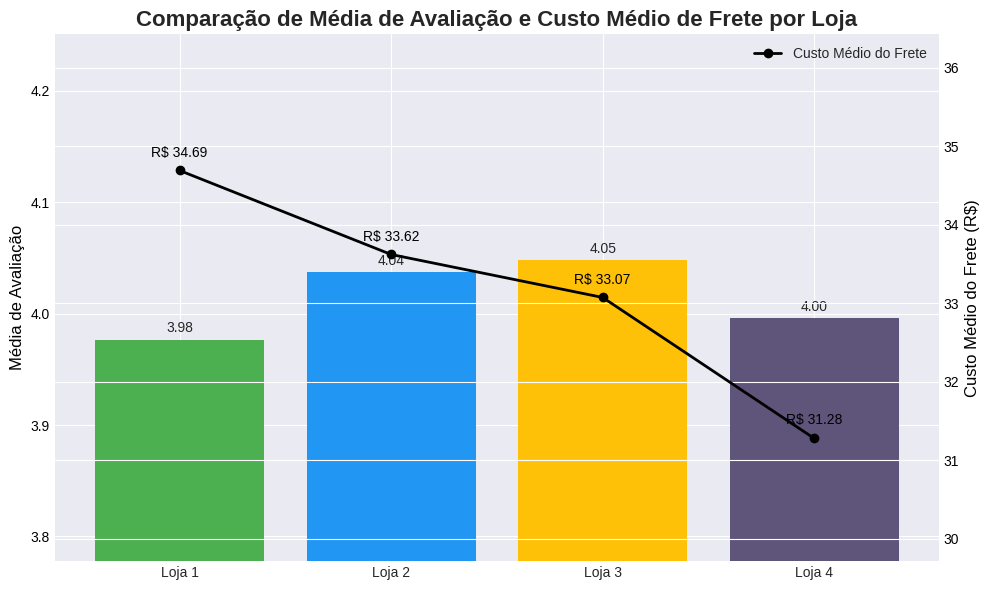

In [ ]:
# Gráfico de Barras para Média de Avaliação por Loja
fig, ax1 = plt.subplots(figsize=(10, 6))
bars_avaliacao = ax1.bar(media_avaliacoes['Loja'], media_avaliacoes['Média de Avaliação'], color=['#4CAF50', '#2196F3', '#FFC107', '#5F5479'])
ax1.set_title('Comparação de Média de Avaliação e Custo Médio de Frete por Loja', fontsize=16, fontweight='bold')
ax1.set_ylabel('Média de Avaliação', color='black', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(media_avaliacoes['Média de Avaliação'].min() * 0.95, media_avaliacoes['Média de Avaliação'].max() * 1.05)
ax1.bar_label(bars_avaliacao, labels=[f'{x:.2f}' for x in media_avaliacoes['Média de Avaliação']], padding=3)

# Gráfico de Linha para Custo Médio de Frete por Loja.
ax2 = ax1.twinx()
line_frete = ax2.plot(custo_medio_frete['Loja'], custo_medio_frete['Custo Médio do Frete'], color='black', marker='o', linewidth=2, label='Custo Médio do Frete')
ax2.set_ylabel('Custo Médio do Frete (R$)', color='black', fontsize=12)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(custo_medio_frete['Custo Médio do Frete'].min() * 0.95, custo_medio_frete['Custo Médio do Frete'].max() * 1.05)
for x, y in zip(custo_medio_frete['Loja'], custo_medio_frete['Custo Médio do Frete']):
    ax2.annotate(f'R$ {y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='black')
fig.legend(line_frete, ['Custo Médio do Frete'], loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Exibir o gráfico.
plt.tight_layout()
plt.savefig('comparacao_avaliacao_frete.png')
plt.show()

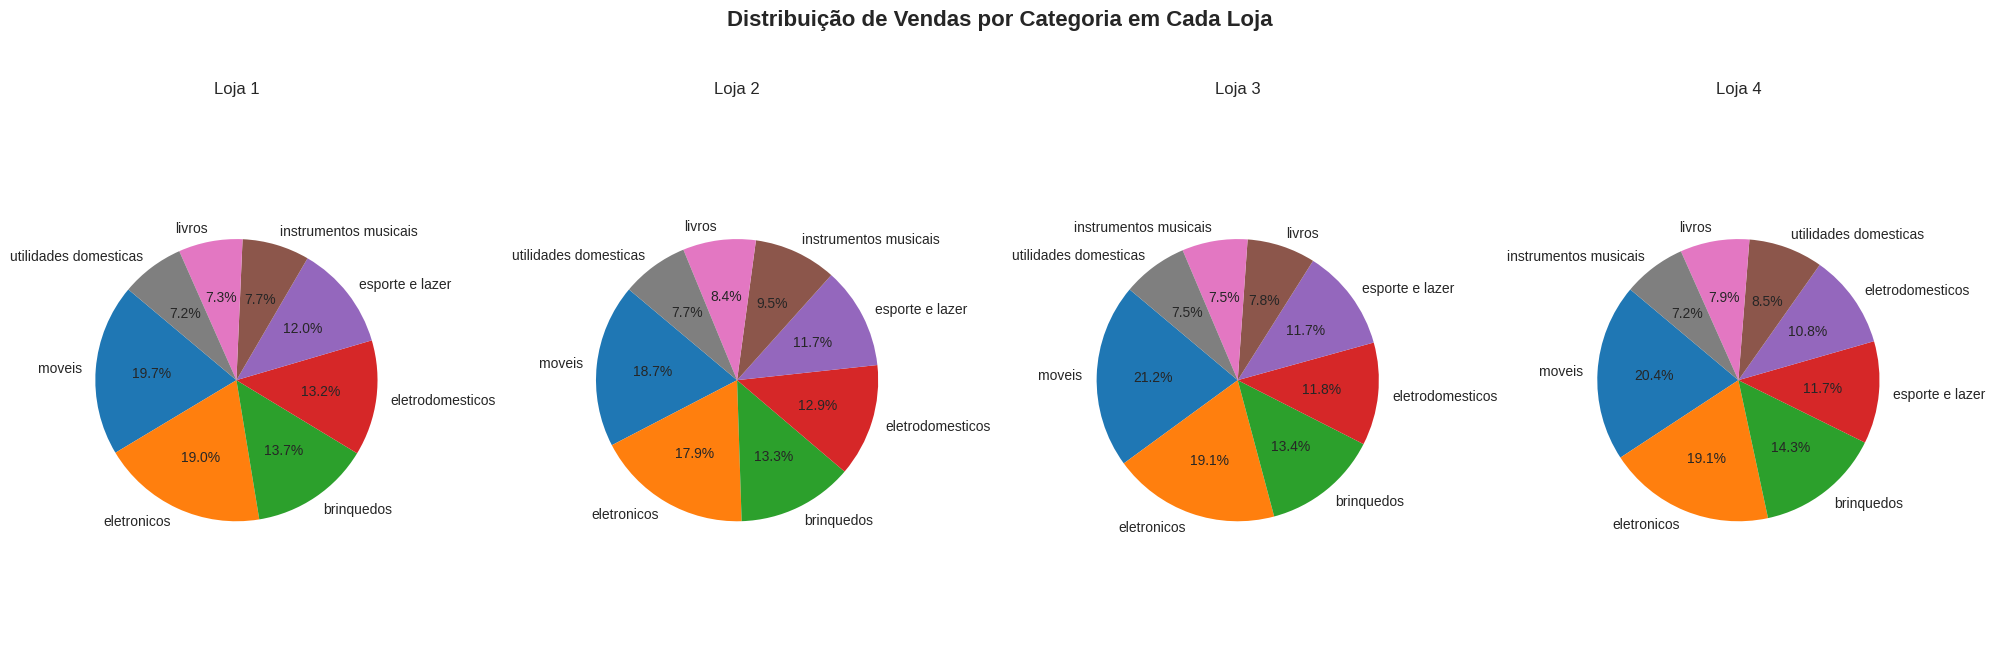

In [ ]:
# Distribuição de vendas por categoria em cada loja (Gráficos de Pizza).
lojas = df_total['Loja'].unique()
n_lojas = len(lojas)

fig, axes = plt.subplots(1, n_lojas, figsize=(20, 7))
fig.suptitle('Distribuição de Vendas por Categoria em Cada Loja', fontsize=16, fontweight='bold')

for i, loja in enumerate(lojas):
    dados_loja = df_total[df_total['Loja'] == loja]
    vendas_categoria_loja = dados_loja['Categoria do Produto'].value_counts()

    axes[i].pie(vendas_categoria_loja, labels=vendas_categoria_loja.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(loja, fontsize=12)
    axes[i].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('distribuicao_vendas_categoria_loja.png')
plt.show()

## **Relatório de Análise Sobre Qual Loja Vender**

Senhor João, depois de esmiuçar os dados das quatro lojas, dá pra dizer com segurança que cada uma tem seus méritos. Mas quando o objetivo é vender, não estamos buscando a melhor loja. Estamos buscando a mais vendável.

A Loja 2, por exemplo, é a campeã de faturamento. Atrai olhares, parece a mais lucrativa. Mas ela depende quase que exclusivamente da categoria “Móveis”. Isso é um risco. Qualquer mudança no mercado, uma moda que passa ou um concorrente agressivo, e esse número pode cair. Um comprador atento vai perceber isso. E talvez pense duas vezes antes de investir pesado num negócio com base tão estreita.

A Loja 1 é estável. Fatura bem, tem boas avaliações e custos baixos de frete. É uma operação saudável. Vender agora pode significar abrir mão de um ativo sólido. Talvez valha mais a pena mantê-la como âncora da rede.

A Loja 3 tem foco em livros. É um mercado específico. Pode funcionar, pode dar lucro, mas também exige um comprador com perfil muito claro. Alguém que entenda do setor, que tenha paixão pelo produto. Não é um negócio que qualquer um compra.

Já a Loja 4 tem um perfil interessante. Fatura menos, é verdade. Mas tem foco em roupas e acessórios, um segmento com apelo amplo. É simples de entender, de operar e de escalar. Pode ser atraente pra quem quer entrar no varejo sem complicação. E, por estar num ponto mais baixo da curva, tem margem pra crescer. É o tipo de loja que pode ser transformada com pouco investimento e boas ideias.

Diante disso, a recomendação é vender a Loja 4. Não porque ela é a pior, mas porque ela é a mais fácil de passar adiante. O nicho é popular, o modelo é direto, e o potencial de valorização pode ser um argumento forte na negociação.